In [1]:
# Specify the parameter values
va_value = 0.5
s2vh_value = 0.8
wsp_value = 0.2

# Use the %run magic command to execute the script with specified parameters
%run RUNME_for_KIT_homophily --va $va_value --s2vh $s2vh_value --wsp $wsp_value

Trial: 0 of 1 alpha = 0.0001
I will do  100000  steps
rescaling factor:  -0.00034612496150444297
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
final H:  0.3656120204017897
The simulations are now completed. now saving the results...


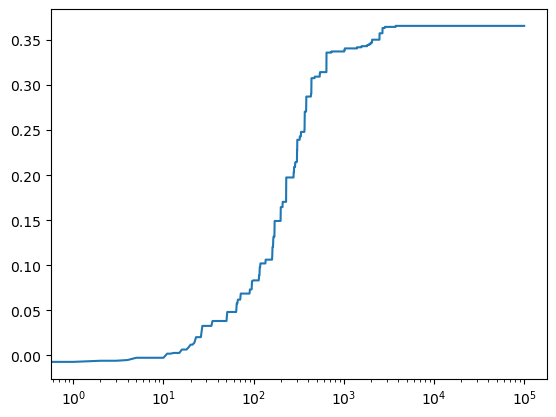

In [2]:
# load the H_hist.csv file
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

H_hist = pd.read_csv('H_hist.csv')
# convert H_hist into a np array
H_hist = H_hist.to_numpy()

plt.semilogx(H_hist)


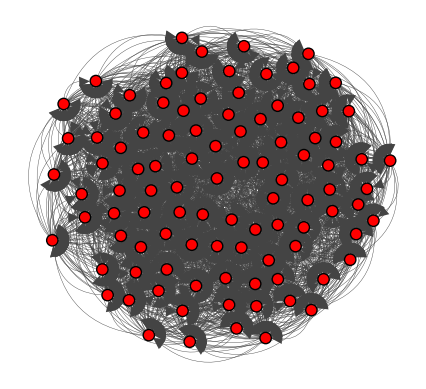

<Figure size 640x480 with 0 Axes>

In [7]:
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt


# load the opinion distribution from the file
BB = pd.read_csv('all_B.csv')
# convert BB into a np array
BB = BB.to_numpy()
B = BB[0]


# load the graph from ADJ.csv
g = ig.Graph.Read_Adjacency("ADJ.csv")

cmap = plt.get_cmap('coolwarm')
colors = cmap(B)
#plot the graph:
# convert B into a colormap from blue (0) to red (1)

ig.plot(g,  vertex_size=0.1, edge_width=0.3)
plt.show()
# save the plot
plt.savefig('graph.png')

In [50]:

def plot_infected_behavior(g,layout,axs,i,j):
    

    g.vs["shape"] = [("circle" if v['health_status'] == 1 else "rectangle") for v in g.vs]
    g.vs["size"] =  [(0.7 if v['health_status'] == 1 else 1) for v in g.vs]
    
    
    cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["blue", "red"])
    
    g.vs["color"] = [cmap1(v["behavior_status"]*0.99) for v in g.vs]

    # I set the color of the edges to white
    g.es["color"] = "white"
    # I set the color of the countour of the nodes to white
    g.vs["label_color"] = "white"
    # I set the color of the border of the nodes to white
    g.vs["label"] = ["" for v in g.vs]

    for ii,v in enumerate(g.vs):
        if(ii == np.floor(31*31/2)):
            v["color"] = "black"
            v["size"] = 1
            v["shape"] = "rectangle"
#    g.vs[][] = [v.index for v in g.vs]
    ig.plot(
        g,
        target=axs[i,j],
        layout = layout,
        vertex_frame_width=0,
        legend = "test"
    )
    return axs[i,j]

NameError: name 'visual_style' is not defined

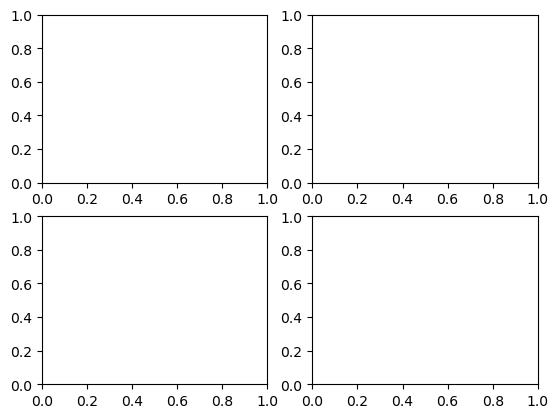

In [8]:
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()
for g, color, ax in zip([g, g, g, g], colors, axs):
    ig.plot(g, target=ax, vertex_color=color, **visual_style)
plt.show()

In [53]:
visual_style = {
    "edge_width": 0.3,
    "vertex_size": 15,
    "palette": "heat",
    "layout": "fruchterman_reingold"
}

ValueError: palette index used when no palette was given

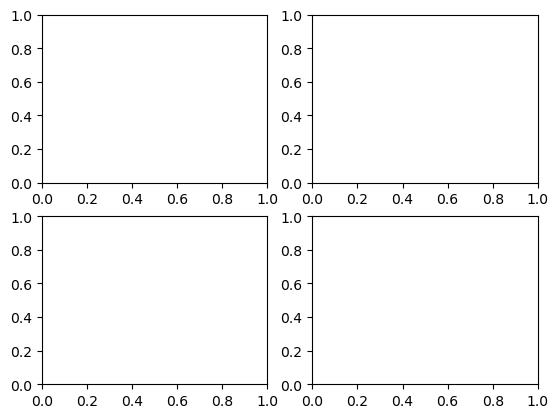

In [9]:
import igraph as ig
import matplotlib.pyplot as plt
import random

visual_style = {
    "edge_width": 0.3,
    "vertex_size": 15,
    "palette": "heat",
    "layout": "fruchterman_reingold"
}

random.seed(1)
gs = [ig.Graph.Barabasi(n=30, m=1) for i in range(4)]

betweenness = [g.betweenness() for g in gs]
colors = [[int(i * 255 / max(btw)) for i in btw] for btw in betweenness]

fig, axs = plt.subplots(2, 2)
axs = axs.ravel()

ig.plot(g, target=1, vertex_color=color, **visual_style)


In [58]:
ig.__version__

'0.8.0'